### Library Imports

In [2]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import gc
warnings.simplefilter('ignore')
matplotlib.rcParams['figure.dpi'] = 100
sns.set()
%matplotlib inline

### Dataset Imports

In [14]:
%%time
train = pd.read_csv('D:/Downloads/final-year-project/data/train.csv')
weather_train = pd.read_csv('D:/Downloads/final-year-project/data/weather_train.csv')
test = pd.read_csv('D:/Downloads/final-year-project/data/test.csv')
weather_test = pd.read_csv('D:/Downloads/final-year-project/data/weather_test.csv')
building = pd.read_csv('D:/Downloads/final-year-project/data/building_metadata.csv')

CPU times: total: 14.1 s
Wall time: 23.6 s


In [15]:
train = train.merge(building, on='building_id', how='left')
test = test.merge(building, on='building_id', how='left')

train = train.merge(weather_train, on=['site_id', 'timestamp'], how='left')
test = test.merge(weather_test, on=['site_id', 'timestamp'], how='left')
del weather_train, weather_test,building
gc.collect();

### Mean meter reading by building_id

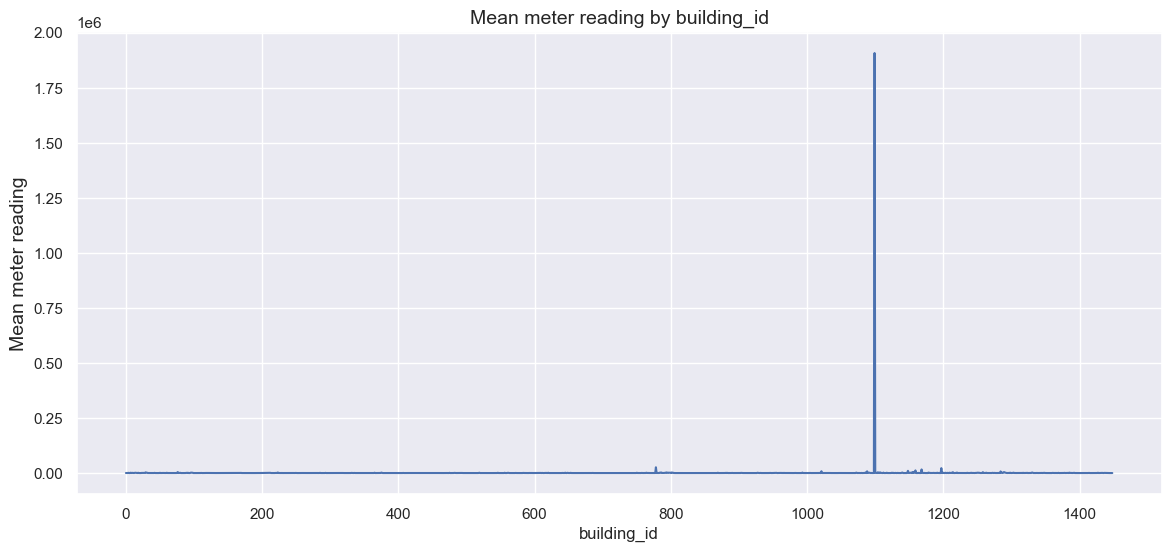

In [7]:
# Convert 'timestamp' column to datetime format
train_df['timestamp'] = pd.to_datetime(train_df['timestamp'])
test_df['timestamp'] = pd.to_datetime(test_df['timestamp'])

fig, axes = plt.subplots(1,1,figsize=(14, 6))
train_df.groupby('building_id')['meter_reading'].mean().plot();
axes.set_title('Mean meter reading by building_id', fontsize=14);
axes.set_ylabel('Mean meter reading', fontsize=14);

### Air Temperature Across Timestamp

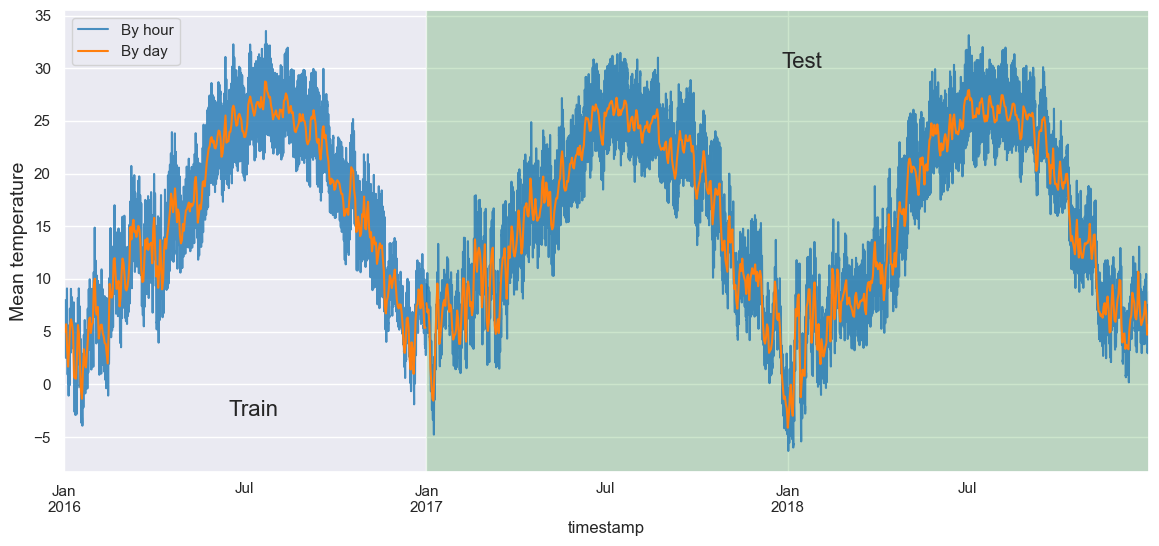

In [16]:
# Convert 'timestamp' column to datetime format
train['timestamp'] = pd.to_datetime(train['timestamp'])
test['timestamp'] = pd.to_datetime(test['timestamp'])

fig, axes = plt.subplots(1,1,figsize=(14, 6), dpi=100)
train[['timestamp', 'air_temperature']].set_index('timestamp').resample('H').mean()['air_temperature'].plot(ax=axes, alpha=0.8, label='By hour', color='tab:blue').set_ylabel('Mean temperature', fontsize=14);
test[['timestamp', 'air_temperature']].set_index('timestamp').resample('H').mean()['air_temperature'].plot(ax=axes, alpha=0.8, color='tab:blue', label='');
train[['timestamp', 'air_temperature']].set_index('timestamp').resample('D').mean()['air_temperature'].plot(ax=axes, alpha=1, label='By day', color='tab:orange');
test[['timestamp', 'air_temperature']].set_index('timestamp').resample('D').mean()['air_temperature'].plot(ax=axes, alpha=1, color='tab:orange', label='');
axes.legend();
axes.text(train['timestamp'].iloc[9000000], -3, 'Train', fontsize=16);
axes.text(test['timestamp'].iloc[29400000], 30, 'Test', fontsize=16);
axes.axvspan(test['timestamp'].min(), test['timestamp'].max(), facecolor='green', alpha=0.2);

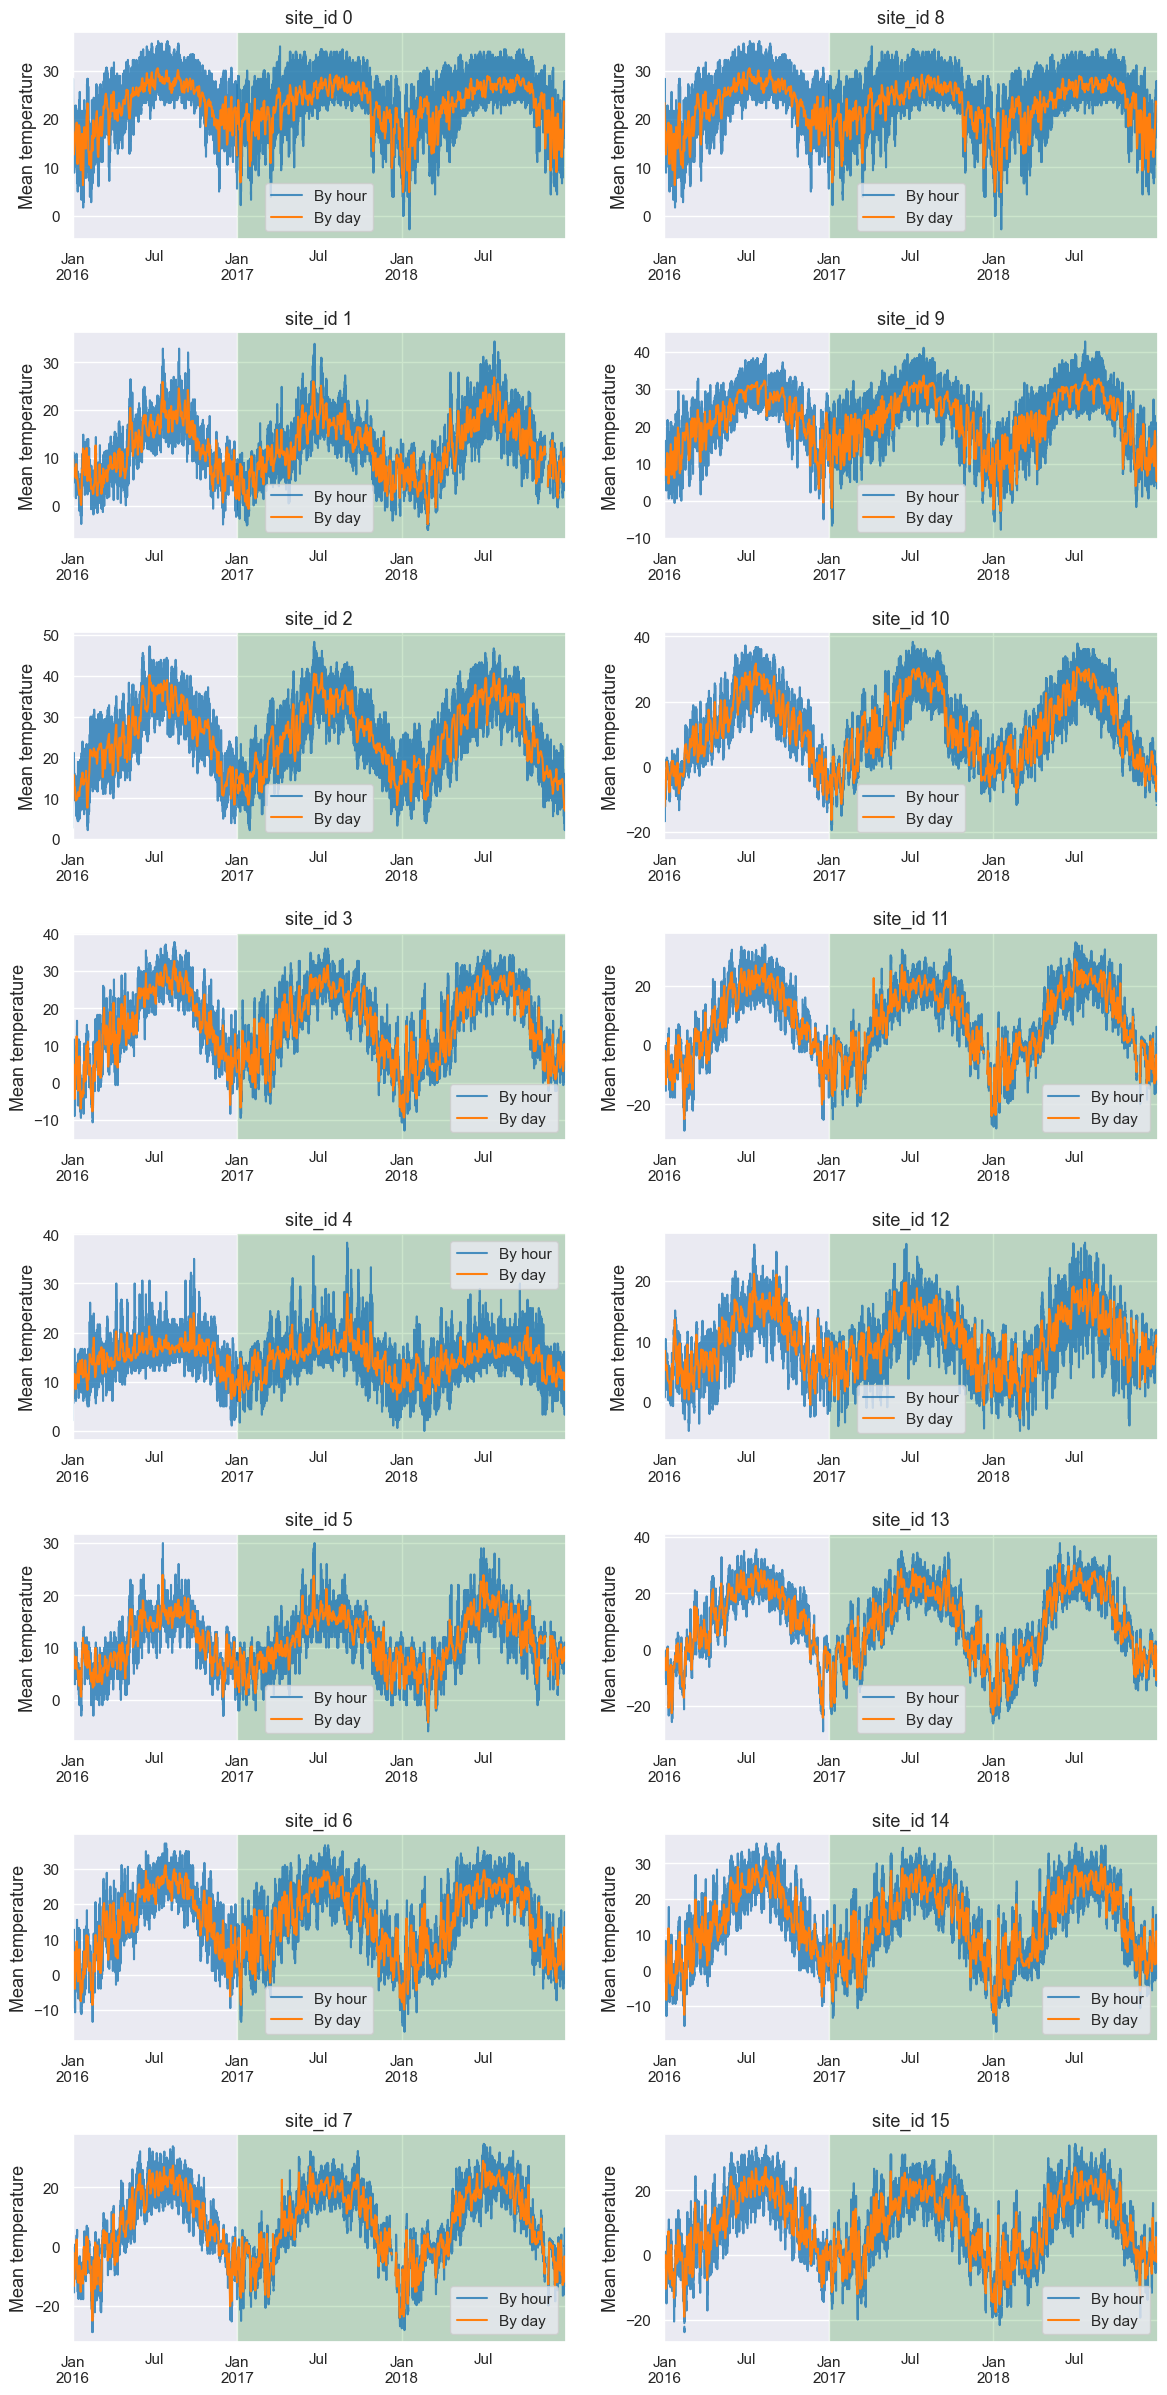

In [17]:
fig, axes = plt.subplots(8,2,figsize=(14, 30), dpi=100)
for i in range(train['site_id'].nunique()):
    train[train['site_id'] == i][['timestamp', 'air_temperature']].set_index('timestamp').resample('H').mean()['air_temperature'].plot(ax=axes[i%8][i//8], alpha=0.8, label='By hour', color='tab:blue').set_ylabel('Mean temperature', fontsize=13);
    test[test['site_id'] == i][['timestamp', 'air_temperature']].set_index('timestamp').resample('H').mean()['air_temperature'].plot(ax=axes[i%8][i//8], alpha=0.8, color='tab:blue', label='').set_xlabel('')
    train[train['site_id'] == i][['timestamp', 'air_temperature']].set_index('timestamp').resample('D').mean()['air_temperature'].plot(ax=axes[i%8][i//8], alpha=1, label='By day', color='tab:orange')
    test[test['site_id'] == i][['timestamp', 'air_temperature']].set_index('timestamp').resample('D').mean()['air_temperature'].plot(ax=axes[i%8][i//8], alpha=1, color='tab:orange', label='').set_xlabel('')
    axes[i%8][i//8].legend();
    axes[i%8][i//8].set_title('site_id {}'.format(i), fontsize=13);
    axes[i%8][i//8].axvspan(test['timestamp'].min(), test['timestamp'].max(), facecolor='green', alpha=0.2);
    plt.subplots_adjust(hspace=0.45)

### Wind Direction and Wind Speed

In [18]:
print('Number of observations with 0 degree direction in TRAIN: {} ({:.2f}%)'.format(train[train['wind_direction'] == 0].shape[0], train[train['wind_direction'] == 0].shape[0] / len(train)))
print('Number of observations with 0 degree direction in TEST: {} ({:.2f}%)'.format(test[test['wind_direction'] == 0].shape[0], test[test['wind_direction'] == 0].shape[0] / len(test)))
print('Number of observations with 360 degree direction in TRAIN: {} ({:.2f}%)'.format(train[train['wind_direction'] == 360].shape[0], train[train['wind_direction'] == 360].shape[0] / len(train)))
print('Number of observations with 360 degree direction in TEST: {} ({:.2f}%)'.format(test[test['wind_direction'] == 360].shape[0], test[test['wind_direction'] == 360].shape[0] / len(test)))

Number of observations with 0 degree direction in TRAIN: 2373540 (0.12%)
Number of observations with 0 degree direction in TEST: 4796510 (0.12%)
Number of observations with 360 degree direction in TRAIN: 421533 (0.02%)
Number of observations with 360 degree direction in TEST: 813553 (0.02%)


In [19]:
print('Number of observations that have calm conditions in TRAIN: {} ({:.2f}%)'.format(train[train['wind_speed'] == 0].shape[0], train[train['wind_speed'] == 0].shape[0] / len(train)))
print('Number of observations that have calm conditions in TEST: {} ({:.2f}%)'.format(test[test['wind_speed'] == 0].shape[0], test[test['wind_speed'] == 0].shape[0] / len(test)))

Number of observations that have calm conditions in TRAIN: 2384761 (0.12%)
Number of observations that have calm conditions in TEST: 4822497 (0.12%)


### Amount of data and NaNs

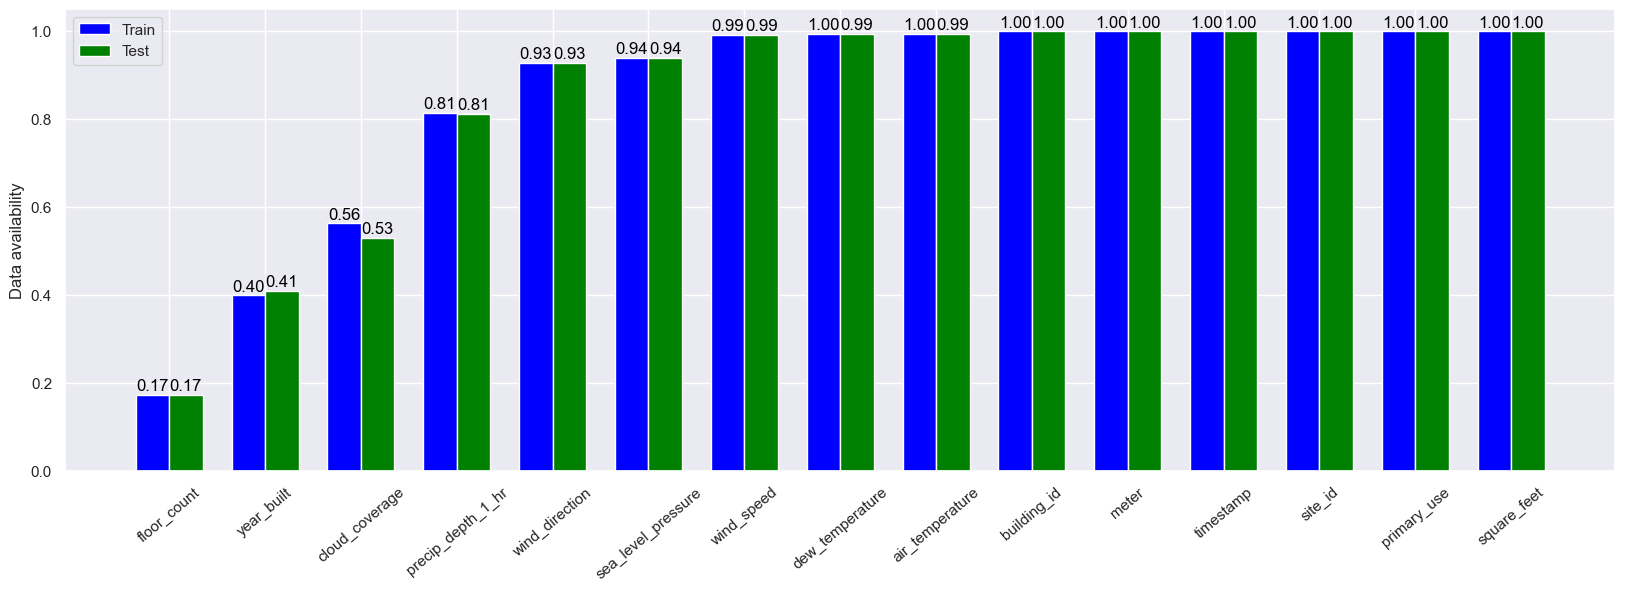

In [29]:
train_data = (train.count() / len(train)).drop('meter_reading').sort_values().values
ind = np.arange(len(train_data))
width = 0.35

fig, axes = plt.subplots(1,1,figsize=(20, 6), dpi=100)
tr = axes.bar(ind, train_data, width, color='blue')

test_data = (test.count() / len(test)).drop('row_id').sort_values().values
tt = axes.bar(ind+width, test_data, width, color='green')

axes.set_ylabel('Data availability');
axes.set_xticks(ind + width / 2)
axes.set_xticklabels((train.count() / len(train)).drop('meter_reading').sort_values().index, rotation=40)
axes.legend([tr, tt], ['Train', 'Test'])

# Adding annotations
for i, v in enumerate(train_data):
    axes.text(i - 0.17, v + 0.01, "{:.2f}".format(v), color='black')
for i, v in enumerate(test_data):
    axes.text(i + 0.18, v + 0.01, "{:.2f}".format(v), color='black')
